## Sentiment Analysis

In [1]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [2]:
# read data files 
g = open('reviews.txt','r') # What we know!
reviews_all = list(map(lambda x:x[:-1],g.readlines()))
g.close()
g = open('labels.txt','r') # What we WANT to know!
sentiments_all = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

# load vocabulary
g = open('vocab.txt','r')
vocab = [s.strip() for s in g.readlines()]

The data is a set of 25000 movie reviews, along with a `POSITIVE` or `NEGATIVE` sentiment label assigned to the review.

In [3]:
# Check out sample reviews
print('A {} review:'.format(sentiments_all[0]))
print(reviews_all[0])
print('\nA {} review:'.format(sentiments_all[1]))
print(reviews_all[1])

A POSITIVE review:
bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   

A NEGATIVE review:
story of a man who has unnatural feelings for a pig . starts out with a opening scene that is a terrific example of absurd comed

In [4]:
# split into training and test data
reviews_train,reviews_test = reviews_all[0:24000],reviews_all[24000:]
sentiments_train,sentiments_test = sentiments_all[0:24000],sentiments_all[24000:]

In [5]:
# maintain Counter objects to store positive, negative and total counts for
# all the words present in the positive, negative and total reviews.
positive_word_count = Counter()
negative_word_count = Counter()
total_counts = Counter()
# Loop over all the words in the vocabulary
# and increment the counts in the appropriate counter objects
# based on the training data
positive_list=[]
negative_list=[]
total_list=[]
for i in range(0,len(reviews_train)):  
    for word in reviews_train[i].split():
        if len(word)==1 or word==' ':
            continue
        else:
            total_list.append(word)
            if sentiments_train[i] == 'POSITIVE':
                positive_list.append(word)
            elif sentiments_train[i] == 'NEGATIVE':
                negative_list.append(word)
        
#print(positive_list)
positive_word_count = Counter(positive_list)
print(len(positive_word_count))
negative_word_count = Counter(negative_list)
print(len(negative_word_count))
total_counts = Counter(total_list)
print(len(total_counts))


54252
52652
72782


In [6]:
# maintain a Counter object to store positive to negative ratios 
pos_neg_ratios = Counter()

# Calculate the ratios of positive and negative uses of the most common words
# Consider words to be "common" if they've been used at least 100 times
for term,cnt in list(total_counts.most_common()):
    if(cnt > 100):
#         # Code for calculating the ratios (remove the next line)
        pos_neg_ratios[term] = (positive_word_count[term]+1)/(negative_word_count[term]+1)

#print(len(pos_neg_ratios))

In [7]:
print("Pos-to-neg ratio for 'the' = {}".format(pos_neg_ratios["the"]))
print("Pos-to-neg ratio for 'amazing' = {}".format(pos_neg_ratios["amazing"]))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios["terrible"]))

Pos-to-neg ratio for 'the' = 1.0618578344986418
Pos-to-neg ratio for 'amazing' = 4.019607843137255
Pos-to-neg ratio for 'terrible' = 0.17317612380250552


In [8]:
# take a log of the ratio
for word,ratio in pos_neg_ratios.most_common():
    pos_neg_ratios[word] = np.log(ratio)
    #print(pos_neg_ratios[word])
    
    

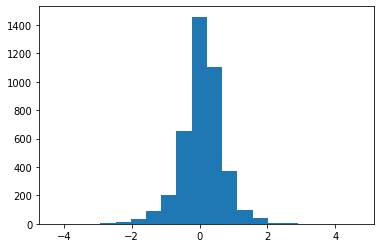

In [9]:
# visualize the distribution of the log-ratio scores
scores = np.array(list(pos_neg_ratios.values()))
vocab_selected = list(pos_neg_ratios.keys())

h = plt.hist(scores,bins=20)

The above histogram should give you an idea about the distribution of the scores.

Notice how the scores are distributed around 0. A word with score 0 can be considered as `neutral`. 

In [10]:
# Print few words with neutral score
for ind in np.where(scores == 0)[0][0:10]:
    print(vocab_selected[ind])

realize
hands
extreme
beat
onto
psycho
test
obsessed
choose
speech


**APPROACH 1** Implement a simple non-machine learning that only uses the log-ratios to determine if a review is positive or negative. This function will be applied to the test data to calculate the accuracy of the model. 

In [11]:
def nonml_classifier(review,pos_neg_ratios):
    '''
    Function that determines the sentiment for a given review.
    
    Inputs:
      review - A text containing a movie review
      pos_neg_ratios - A Counter object containing frequent words
                       and corresponding log positive-negative ratio
    Return:
      sentiment - 'NEGATIVE' or 'POSITIVE'
    ''' 
    positive=0
    negative=0
    #print(len(pos_neg_ratios.keys())
    for word in review.split():
        if word in pos_neg_ratios.keys():
            if pos_neg_ratios[word]>0.3:
                positive=positive+1
            elif pos_neg_ratios[word]< -0.3:
                negative=negative+1

    if positive>=negative:
        return 'POSITIVE'
    else:
        return 'NEGATIVE'

In [12]:
predictions_test = []
for r in reviews_test:
    l = nonml_classifier(r,pos_neg_ratios)
    predictions_test.append(l)

# calculate accuracy
correct = 0
for l,p in zip(sentiments_test,predictions_test):
    if l == p:
        correct = correct + 1
print('Accuracy of the model = {}'.format(correct/len(sentiments_test)))

Accuracy of the model = 0.761


**Approach 2** Implement a neural network for sentiment classification. 

> ### System Configuration
This part requires `tensorflow` library installed. More information is available here - https://www.tensorflow.org.

To use the `tensorflow` library have two options: 
1. Install `tensorflow` on personal machines. Detailed installation information is here - https://www.tensorflow.org/. Note that, since `tensorflow` is a relatively new library, you might encounter installation issues depending on your OS and other library versions. 
2. To maintain a ssh connection for a long-running task on a remote machine, use tools like `screen`. For more information: https://linuxize.com/post/how-to-use-linux-screen/ 
3. For running jupyter-notebook over a remote machine find information on: https://fizzylogic.nl/2017/11/06/edit-jupyter-notebooks-over-ssh/
 


In [13]:
def create_input_vector(review,word2index):
    '''
    Function to count how many times each word is used in the given review,
    # and then store those counts at the appropriate indices inside x.
    '''
    vocab_size = len(word2index)
    x = np.zeros((1, vocab_size))
    for w in review.split(' '):
        if w in word2index.keys():
            x[0][word2index[w]] += 1
    return x

In [14]:
def find_ignore_words(pos_neg_ratios):
    '''
    Function to identify words to ignore from the vocabulary
    '''
    ignore_words = []
    # mplementation of find_ignore_words
#     for term,cnt in list(total_counts.most_common()):
#         if(cnt < 100 ):
#             ignore_words.append(term)
    for term,cnt in list(pos_neg_ratios.most_common()):
        if(cnt>=-0.3 and cnt<=0.3):
            ignore_words.append(term)
    return ignore_words

In [15]:
# create a word2index mapping from word to an integer index
word2index = {}
ignore_words = find_ignore_words(pos_neg_ratios)
vocab_selected = list(set(vocab_selected).difference(set(ignore_words)))
for i,word in enumerate(vocab_selected):
    if word not in ignore_words:
        word2index[word] = i
vocab_size = len(word2index)

#### Generate .hdf5 files from the processed data
Given that the data is moderately large sized, the `hdf5` file format provides a more efficient file representation for further processing. See [here](https://anaconda.org/anaconda/hdf5) for more details and installation instructions.

In [16]:
import h5py

In [17]:
# Run the script once to generate the file 
# delete the existing 'data1.hdf5' file before running it again to avoid error 
labels_train = np.zeros((len(sentiments_train), 2), dtype=int)
labels_test = np.zeros((len(sentiments_test), 2), dtype=int)

with h5py.File('data1.hdf5', 'w') as hf:
    hf.create_dataset('data_train', (labels_train.shape[0], vocab_size), np.int16)
    hf.create_dataset('data_test', (labels_test.shape[0], vocab_size), np.int16)
    # create training data
    for i,(r,l) in enumerate(zip(reviews_train, sentiments_train)):
        hf["data_train"][i] = create_input_vector(r,word2index)
        # one-hot encoding
        if l == 'NEGATIVE':
            labels_train[i, 0] = 1
        else:
            labels_train[i, 1] = 1
    # create test data
    for i,(r,l) in enumerate(zip(reviews_test, sentiments_test)):
        hf["data_test"][i] = create_input_vector(r,word2index)
        # one-hot encoding
        if l == 'NEGATIVE':
            labels_test[i, 0] = 1
        else:
            labels_test[i, 1] = 1

In [18]:
import tensorflow as tf 
tf.compat.v1.random.set_random_seed(10)

In [70]:
# parameters of the network
learning_rate = 0.001
batch_size = 400
num_epochs = 50
n_input = vocab_size
n_classes = 2

In [71]:
#working code for 1 layer
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# Define weights and biases in Tensorflow according to the parameters set above
   # 1st layer number of neurons
n_hidden_1 = 128  # 1st layer number of neurons
weights = {
	'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
	'out1': tf.Variable(tf.random_normal([n_hidden_1, n_classes]))
}
biases = {
	'b1': tf.Variable(tf.random_normal([n_hidden_1])),
	'out2': tf.Variable(tf.random_normal([n_classes]))
}

In [72]:
# #2 layers
# X = tf.placeholder("float", [None, n_input])
# Y = tf.placeholder("float", [None, n_classes])

# # Define weights and biases in Tensorflow according to the parameters set above
# n_hidden_1 = 10  # 1st layer number of neurons
# n_hidden_2 = 10
# weights = {
# 	'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
#     'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
# 	'out1': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
# }
# biases = {
# 	'b1': tf.Variable(tf.random_normal([n_hidden_1])),
#     'b2': tf.Variable(tf.random_normal([n_hidden_2])),
# 	'out2': tf.Variable(tf.random_normal([n_classes]))
# }

In [73]:
# # 4 Hidden layers
# X = tf.placeholder("float", [None, n_input])
# Y = tf.placeholder("float", [None, n_classes])

# # Define weights and biases in Tensorflow according to the parameters set above
# n_hidden_1 = 10  # 1st layer number of neurons
# n_hidden_2 = 10  # 2nd layer number of neurons
# n_hidden_3 = 10  # 3rd layer number of neurons
# n_hidden_4 = 10  # 4th layer number of neurons
# weights = {
# 	'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
#     'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
#     'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
#     'h4': tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4])),
# 	'out1': tf.Variable(tf.random_normal([n_hidden_4, n_classes]))
# }
# biases = {
# 	'b1': tf.Variable(tf.random_normal([n_hidden_1])),
#     'b2': tf.Variable(tf.random_normal([n_hidden_2])),
#     'b3': tf.Variable(tf.random_normal([n_hidden_3])),
#     'b4': tf.Variable(tf.random_normal([n_hidden_4])),
# 	'out2': tf.Variable(tf.random_normal([n_classes]))
# }

In [74]:
# Single layered architecture
def multilayer_perceptron(x):
    # define the layers of a single layer perceptron
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1']) 
    out_layer = tf.nn.sigmoid(tf.matmul(layer_1, weights['out1']) + biases['out2'])
    return out_layer

In [75]:
# #2 Layered Architecture
# def multilayer_perceptron(x):
#     # define the layers of a single layer perceptron
#     layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
#     layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
#     out_layer = tf.nn.sigmoid(tf.matmul(layer_2, weights['out1'] + biases['out2']))
#     return out_layer

In [76]:
# #4 Layered Architure
# def multilayer_perceptron(x):
#     # define the layers of a single layer perceptron
#     layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
#     layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
#     layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
#     layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
#     out_layer = tf.nn.sigmoid(tf.matmul(layer_4, weights['out1'] + biases['out2']))
#     return out_layer

In [77]:
logits = multilayer_perceptron(X)
# Define loss(softmax_cross_entropy_with_logits) and optimizer(AdamOptimizer)
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)
# Initializing the variables
init = tf.global_variables_initializer()

In [78]:
# for some macosx installations, conflicting copies of mpilib causes trouble with tensorflow.
# use the following two lines to resolve that issue
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [79]:
with tf.Session() as sess:
    start_time = time.time()
    sess.run(init)

    h = h5py.File('data1.hdf5', 'r')
    n1 = h.get('data_train') 
    n2 = h.get('data_test')

    # Training cycle
    total_batch_train = int(n1.shape[0] / batch_size)
    total_batch_test = int(n2.shape[0] / batch_size)
    plt_acc=[]
    for iter_num in range(num_epochs):
        # variables for train and test accuracies
        avg_acc_train = 0.
        avg_acc_test = 0.
        for i in range(total_batch_train):
            train_x = n1[(i) * batch_size: (i + 1) * batch_size, ...]
            train_y = labels_train[(i) * batch_size: (i + 1) * batch_size, :]

            _ , c_train, _logits_train = sess.run([train_op, loss_op, logits], feed_dict={X: train_x, Y: train_y})
            _label_train = [np.argmax(i) for i in _logits_train]
            _label_train_y = [np.argmax(i) for i in train_y]
            _accuracy_train = np.mean(np.array(_label_train) == np.array(_label_train_y))
            avg_acc_train += _accuracy_train


        for j in range(total_batch_test):
            test_x = n2[(j) * batch_size: (j + 1) * batch_size, ...]
            test_y = labels_test[(j) * batch_size: (j + 1) * batch_size, :]

            c_test, _logits_test = sess.run([loss_op, logits], feed_dict={X: test_x, Y: test_y})
            _label_test = [np.argmax(i) for i in _logits_test]
            _label_test_y = [np.argmax(i) for i in test_y]
            _accuracy_test = np.mean(np.array(_label_test) == np.array(_label_test_y))
            avg_acc_test += _accuracy_test
        # Plot for epochs and accuracy
        plt_acc.append(avg_acc_test/total_batch_test)
        # print the train and test accuracies   
        print("Train acc: %f, Test_acc: %f" % (avg_acc_train/total_batch_train, avg_acc_test/total_batch_test))
    duration = time.time() - start_time
    print('Time elapsed - {} seconds.'.format(duration))

Train acc: 0.508417, Test_acc: 0.491250
Train acc: 0.559292, Test_acc: 0.531250
Train acc: 0.600125, Test_acc: 0.582500
Train acc: 0.642667, Test_acc: 0.603750
Train acc: 0.673042, Test_acc: 0.628750
Train acc: 0.705458, Test_acc: 0.666250
Train acc: 0.725167, Test_acc: 0.682500
Train acc: 0.742542, Test_acc: 0.690000
Train acc: 0.755625, Test_acc: 0.702500
Train acc: 0.765167, Test_acc: 0.716250
Train acc: 0.773042, Test_acc: 0.727500
Train acc: 0.780958, Test_acc: 0.737500
Train acc: 0.788833, Test_acc: 0.743750
Train acc: 0.793667, Test_acc: 0.743750
Train acc: 0.798583, Test_acc: 0.753750
Train acc: 0.803333, Test_acc: 0.752500
Train acc: 0.807917, Test_acc: 0.758750
Train acc: 0.811417, Test_acc: 0.765000
Train acc: 0.813875, Test_acc: 0.765000
Train acc: 0.816750, Test_acc: 0.772500
Train acc: 0.820500, Test_acc: 0.770000
Train acc: 0.823375, Test_acc: 0.780000
Train acc: 0.825958, Test_acc: 0.777500
Train acc: 0.827875, Test_acc: 0.775000
Train acc: 0.830458, Test_acc: 0.780000


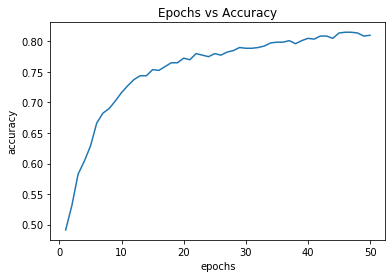

In [80]:
xaxis = list(range(1,num_epochs+1))
yaxis = plt_acc
plt.plot(xaxis,yaxis)
plt.title("Epochs vs Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()